# <center> Classification
<center> Machine Learning lab 3
<center> 08.11.2021

## K nearest neighbors - own implementation

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
db_iris = datasets.load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)

In [3]:
def kNearestNeighbors(features_train, features_test, labels_train, k):
    results = []
    for pointInTraining in features_test:
        distances = np.linalg.norm(features_train - pointInTraining, axis=1)
        # distances =  distance.euclidean(features_train, pointInTraining)
        nearestNeighborIds = distances.argsort()[:k]
        nearestNeighborLabels = labels_train[nearestNeighborIds]
        results.append(mode(nearestNeighborLabels)[0])
    return results

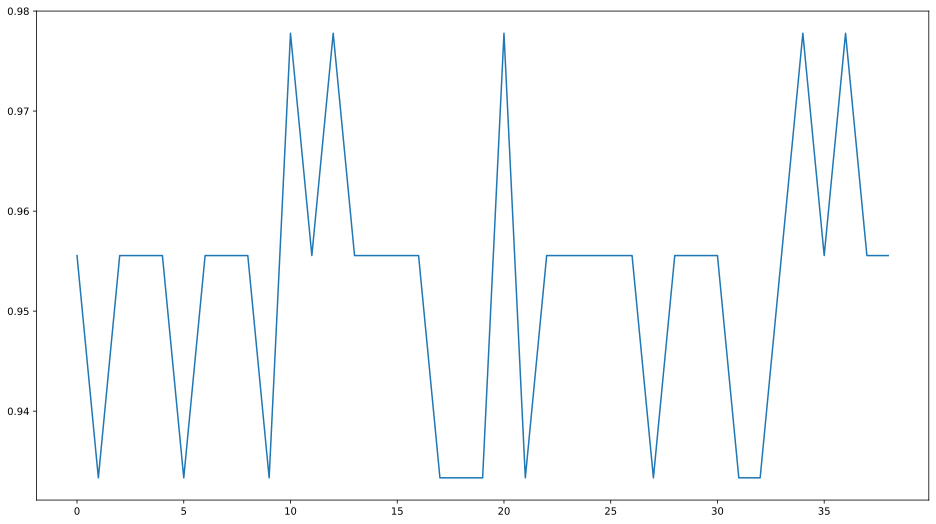

In [4]:
##todo - start from 1

changesInK = []
for i in range(1, 40):
    predictions = kNearestNeighbors(features_train, features_test, labels_train, i)
    changesInK.append(accuracy_score(labels_test, predictions))
plot = plt.plot(changesInK)

## K nearest neighbors - library function

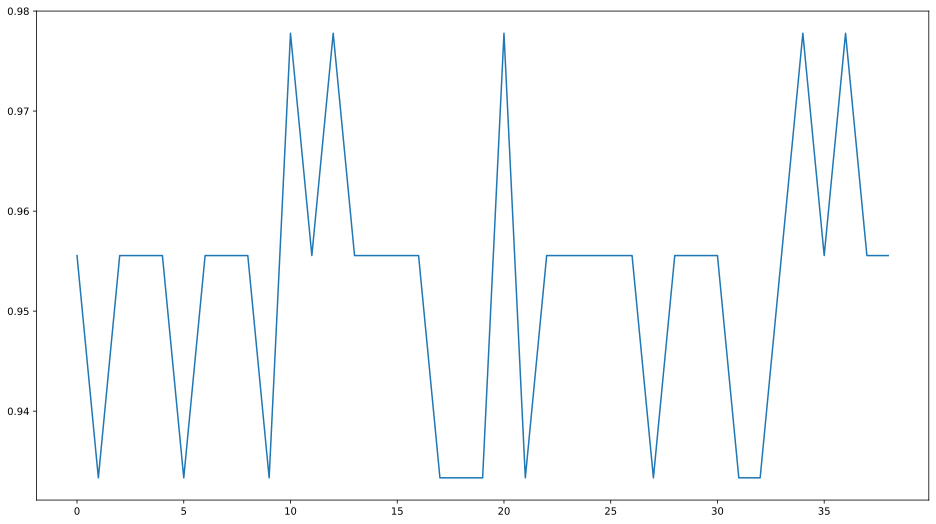

In [5]:
from sklearn.neighbors import KNeighborsClassifier
changesInK = []
for i in range (1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(features_train, labels_train)
    changesInK.append(accuracy_score(labels_test, neigh.predict(features_test)))
plot = plt.plot(changesInK)

## Decision trees

### Iris database example

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
from six import StringIO  
import pydot 
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [7]:
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [8]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

### Hand-written text classification

In [9]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
 
# wczytywanie danych
dane = loadmat('./mnist.mat')
#Ex.1.Divide the data into parameters X and answer y:

X = dane["data"].transpose()
y = dane["label"].transpose()

# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print("Number of digits:")
print(np.size(y))
print("Pixels per image:")
print(np.size(X,1))

Number of digits:
70000
Pixels per image:
784


In [10]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    distance = int(np.size(images, 0)/(n_row*n_col))
    for i in range(n_row * n_col):
        imageNumber = i*distance
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[imageNumber].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[imageNumber], size=12)
        plt.xticks(())
        plt.yticks(())

/home/researcher/anaconda3/envs/data/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


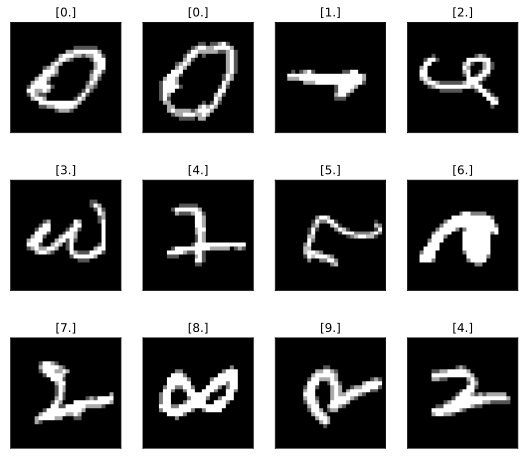

In [11]:
plot_mnist(X, y, h, w)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=161)
clf = tree.DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

In [12]:
y_predict = clf.predict(X_test)
f1_score(y_predict, y_test, average="micro")

0.824047619047619

In [13]:
confusion_matrix(y_predict, y_test)


array([[1839,    5,   46,   23,   10,   66,   41,    4,   35,   18],
       [   1, 2185,   32,   20,   16,   11,   12,   23,   52,    9],
       [  39,   43, 1698,   76,   32,   57,   83,   51,  120,   34],
       [  22,   20,   50, 1628,   17,  127,   25,   28,   73,   63],
       [   8,    8,   53,   21, 1663,   37,   45,   48,   31,   99],
       [  31,   13,   19,  135,   40, 1404,   41,   14,   91,   88],
       [  32,    8,   57,   32,   37,   66, 1816,    6,   46,   11],
       [  26,    9,   44,   34,   20,   25,    6, 1888,   20,   76],
       [  32,   18,   84,   45,   14,   50,   19,   22, 1516,   36],
       [  29,   10,   29,   91,  189,   45,   14,  108,   99, 1668]])

In [14]:
classification_report(y_predict, y_test)

'              precision    recall  f1-score   support\n\n         0.0       0.89      0.88      0.89      2087\n         1.0       0.94      0.93      0.93      2361\n         2.0       0.80      0.76      0.78      2233\n         3.0       0.77      0.79      0.78      2053\n         4.0       0.82      0.83      0.82      2013\n         5.0       0.74      0.75      0.75      1876\n         6.0       0.86      0.86      0.86      2111\n         7.0       0.86      0.88      0.87      2148\n         8.0       0.73      0.83      0.77      1836\n         9.0       0.79      0.73      0.76      2282\n\n    accuracy                           0.82     21000\n   macro avg       0.82      0.82      0.82     21000\nweighted avg       0.83      0.82      0.82     21000\n'